# CA1- CLUSTERING AND MARKET BASKET ANALYSIS

## 1. CLUSTERING

### 1.1. DATA CLEANING  AND PREPARATION FOR CLUSTERING

### 1.1.1. Data understanding

In [1]:
# Importing the libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from matplotlib import style
style.use("ggplot")
sns.set_palette("bright")
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler

import warnings
from warnings import filterwarnings
filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Loading the data into the data frame, combining both Excel sheets
df = pd.concat(pd.read_excel('data.xlsx', sheet_name=None), ignore_index=True)

In [3]:
# To display the top 5 rows
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# To display the shape of dataframe
df.shape

(1067371, 8)

In [5]:
# Checking the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [6]:
# Checking the main statistics. We can see that 'Price' and 'Quantity' have negative values.
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


### 1.1.2. Data manipulation

In [7]:
# Dropping irrelevant columns. StockCode is just a label, doesn't give us important information
df = df.drop(['StockCode'], axis=1)

In [8]:
# Renaming the columns in order to remove the space
df = df.rename(columns={"Description":"Item_name","InvoiceDate": "Invoice_Date", "Customer ID": "Customer_ID"})

In [9]:
# Dropping the duplicate rows

 ## Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

 ## Dropping the duplicates
df = df.drop_duplicates()

number of duplicate rows: (34531, 7)


In [10]:
# Dropping the missing or null values

 ## Finding the null values
print(df.isnull().sum())

 ## Dropping the missing values
df = df.dropna()

Invoice              0
Item_name         4275
Quantity             0
Invoice_Date         0
Price                0
Customer_ID     235063
Country              0
dtype: int64


In [11]:
# Removing negative values from 'Quantity' and 'Price' variable because it doesn't exist negative quantity in real live
variable = 'Quantity' 

df = df.loc[df['Quantity'] >= 0]
df = df.loc[df['Price'] >= 0]

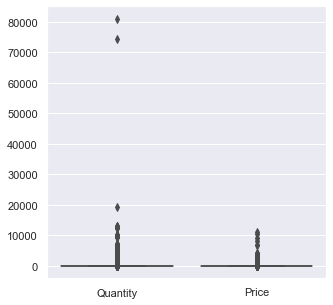

In [12]:
# Detecting Outliers in the numerical variables using boxplot
sns.boxplot(data=df[['Quantity','Price']])
fig=plt.gcf()
fig.set_size_inches(5,5)

In [13]:
# Removing Outliers using IQR technique
Q1_x = df['Quantity'].quantile(0.25)
Q3_x = df['Quantity'].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = df['Price'].quantile(0.25)
Q3_y = df['Price'].quantile(0.75)
IQR_y = Q3_y - Q1_y

lower_limit_x = Q1_x - 1.5 * IQR_x
upper_limit_x = Q3_x + 1.5 * IQR_x

lower_limit_y = Q1_y - 1.5 * IQR_y
upper_limit_y = Q3_y + 1.5 * IQR_y

df= df[(df['Quantity'] >= lower_limit_x) & (df['Quantity'] <= upper_limit_x) & 
                 (df['Price'] >= lower_limit_y) & (df['Price'] <= upper_limit_y)]

### 1.1.3. How does the new df look like?

In [14]:
# Recalling the final dataset as'df_cleaned' after the cleaning process
df_cleaned=df

In [15]:
# Display 5 rows to see how the data looks like
df_cleaned.head()

,Invoice,Item_name,Quantity,Invoice_Date,Price,Customer_ID,Country
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
4,489434,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom


In [16]:
# After cleaning the data we get 663329 rows and 7 columns (original dataset had 1067371 observations and 8 features)
df_cleaned.shape

(663329, 7)

In [17]:
# New statistics
df_cleaned.describe()

,Quantity,Price,Customer_ID
count,663329.000000,663329.000000,663329.000000
mean,7.395707,2.276046,15349.869654
std,6.709633,1.610666,1693.374095
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13999.000000
50%,6.000000,1.690000,15311.000000
75%,12.000000,2.950000,16814.000000
max,27.000000,7.500000,18287.000000


### 1.2. RFM ANALYSIS

### 1.2.1. Recency (R)

In [18]:
# Let's see the latest invoice. The newest date is 09.12.2011. Let's asume that today is 01.01.2012.
df_cleaned.Invoice_Date.unique()

array(['2009-12-01T07:45:00.000000000', '2009-12-01T07:46:00.000000000',
       '2009-12-01T09:06:00.000000000', ...,
       '2011-12-09T12:31:00.000000000', '2011-12-09T12:49:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

In [19]:
# Setting a "current" time variable 
current_date = "2012-01-01"
current_date = pd.to_datetime(current_date)
df_cleaned["Invoice_Date"] = pd.to_datetime(df_cleaned["Invoice_Date"])

In [20]:
# Calculating the recency value for each customer by taking the difference between the today variable and the maximum Invoice_Date value for each customer
recency_table = df_cleaned.groupby(["Customer_ID"]).agg({"Invoice_Date": lambda x: ((current_date - x.max()).days)})
recency_table.columns = ["Recency"]

In [21]:
# Display 5 first rows
recency_table.head()

,Recency
Customer_ID,
12346.0,551
12347.0,24
12348.0,270
12349.0,40
12350.0,332


### 1.2.2. Frequency (F)

In [22]:
# Calculating the frequency of unique invoices for each customer 
frequency_table = df_cleaned.drop_duplicates(subset = "Invoice").groupby(["Customer_ID"])[["Invoice"]].count()
frequency_table.columns = ["Frequency"]
frequency_table.head()

,Frequency
Customer_ID,
12346.0,11
12347.0,8
12348.0,4
12349.0,3
12350.0,1


### 1.2.3. Monetary (M)

In [23]:
# Calculating the total price of each observation
df_cleaned["Total_Price"] = df_cleaned["Quantity"] * df_cleaned["Price"]

In [24]:
# Total monetary value spent by each customer 
monetary_table = df_cleaned.groupby(["Customer_ID"])[["Total_Price"]].sum()
monetary_table.columns = ["Monetary"]
monetary_table.head()

,Monetary
Customer_ID,
12346.0,372.86
12347.0,3888.01
12348.0,312.36
12349.0,2635.04
12350.0,294.40


### 1.2.4. RFM

In [25]:
# Join the 3 tables into one
rfm_df = pd.concat([recency_table, frequency_table, monetary_table], axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary
Customer_ID,,,
12346.0,551,11,372.86
12347.0,24,8,3888.01
12348.0,270,4,312.36
12349.0,40,3,2635.04
12350.0,332,1,294.40


In [26]:
rfm_df.shape

(5679, 3)

In [27]:
# Check the statistics values. We need to scale the data because the difference between the minimum an maximum values is too big and also because is better to analyse values which are in the same scale
rfm_df.describe()

,Recency,Frequency,Monetary
count,5679.000000,5679.000000,5679.000000
mean,222.504138,5.874978,1519.263557
std,208.927074,11.505219,3739.155076
min,22.000000,1.000000,0.000000
25%,47.000000,1.000000,245.865000
50%,117.000000,3.000000,603.850000
75%,401.000000,6.000000,1540.850000
max,760.000000,367.000000,174846.610000


<AxesSubplot:>

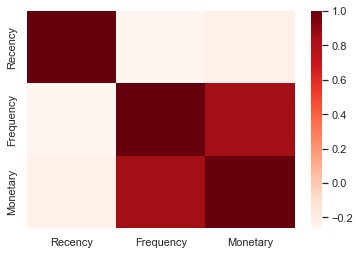

In [28]:
# Analyzing the correlation between the features of rfm_df in order to see which variables are more interesting to analyse. In this case 'Monetary' and 'Frequency'are directly correlated.
sns.heatmap(rfm_df[['Recency','Frequency', 'Monetary']].corr(),cmap="Reds")

In [29]:
## Scaling the data
scaler = StandardScaler()
rfm_scaled =pd.DataFrame(scaler.fit_transform(rfm_df), columns=rfm_df.columns)
rfm_scaled.head()


,Recency,Frequency,Monetary
0,1.572438,0.445491,-0.306621
1,-0.950196,0.184717,0.633554
2,0.227352,-0.162982,-0.322803
3,-0.873607,-0.249907,0.298430
4,0.524133,-0.423756,-0.327606


### 1.3. FIRST CLUSTERING METHOD-KMEANS

### 1.3.1. Cluster Sum of Squares- "The elbow method"

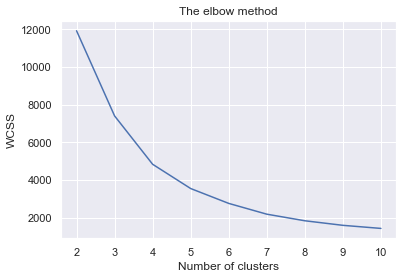

In [30]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 38)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

### 1.3.2. K-Means Clustering

In [31]:
# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)
kmeans.fit(rfm_scaled)
rfm_df["Cluster_Kmeans"] = kmeans.labels_


In [32]:
# We added a new colum called "Cluster_Kmeans" which classify each costumer in one cluster
rfm_df.head()

,Recency,Frequency,Monetary,Cluster_Kmeans
Customer_ID,,,,
12346.0,551,11,372.86,0
12347.0,24,8,3888.01,1
12348.0,270,4,312.36,0
12349.0,40,3,2635.04,1
12350.0,332,1,294.40,0


In [33]:
# Analyzing of Clustering based on RFM
rfm_df.groupby(["Cluster_Kmeans"])[["Recency", "Frequency", "Monetary"]].mean()

,Recency,Frequency,Monetary
Cluster_Kmeans,,,
0,475.167082,2.110723,452.731762
1,84.664939,7.467667,1960.972367
2,66.000000,195.888889,59245.203333


In [34]:
# Print the size of each cluster
print(rfm_df['Cluster_Kmeans'].value_counts())

1    3665
0    2005
2       9
Name: Cluster_Kmeans, dtype: int64


In [35]:
# Finding the center of the each cluster 
centroids_kmeans = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids_kmeans] 
cen_y = [i[1] for i in centroids_kmeans]
centroids_kmeans

array([[ 1.20841093, -0.32717311, -0.28527951],
       [-0.66026164,  0.13867984,  0.11837283],
       [-0.74915096, 16.5169078 , 15.43959041]])

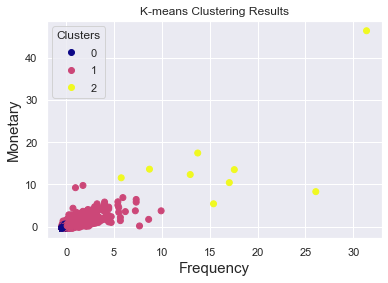

In [36]:
# Plot clusters
scatter=plt.scatter(rfm_scaled['Frequency'], rfm_scaled['Monetary'], c=rfm_df['Cluster_Kmeans'], cmap='plasma')
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)
plt.title('K-means Clustering Results')

# Add legend
plt.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

### 1.4. SECOND CLUSTERING METHOD-KMEDOIDS

### 1.4.1. K-Medoids Clustering

In [37]:
# Import Kmedoids algorithm
from sklearn_extra.cluster import KMedoids

# Apply K-medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(rfm_scaled)

# Add cluster labels to RFM data
rfm_df['Cluster_Kmedoids'] = kmedoids.labels_


In [38]:
# We added a new colum called "Cluster_Kmedoids" which classify each costumer in one cluster
rfm_df.head()

,Recency,Frequency,Monetary,Cluster_Kmeans,Cluster_Kmedoids
Customer_ID,,,,,
12346.0,551,11,372.86,0,1
12347.0,24,8,3888.01,1,0
12348.0,270,4,312.36,0,1
12349.0,40,3,2635.04,1,2
12350.0,332,1,294.40,0,1


In [39]:
# Analyzing of Clustering based on RFM
rfm_df.groupby(["Cluster_Kmedoids"])[["Recency", "Frequency", "Monetary"]].mean()

,Recency,Frequency,Monetary
Cluster_Kmedoids,,,
0,55.394062,22.731444,6652.648092
1,475.297607,2.156032,468.348551
2,91.782742,4.159277,940.920296


In [40]:
# Print the size of each cluster
print(rfm_df['Cluster_Kmedoids'].value_counts())

2    2932
1    2006
0     741
Name: Cluster_Kmedoids, dtype: int64


In [41]:
# Finding the center of the each cluster 
centroids_kmedoids = kmedoids.cluster_centers_
cen_x = [i[0] for i in centroids_kmedoids] 
cen_y = [i[1] for i in centroids_kmedoids]
centroids_kmedoids

array([[-0.75872453,  1.05396426,  0.88311052],
       [ 1.09854633, -0.33683141, -0.28815291],
       [-0.70606994, -0.16298195, -0.1903682 ]])

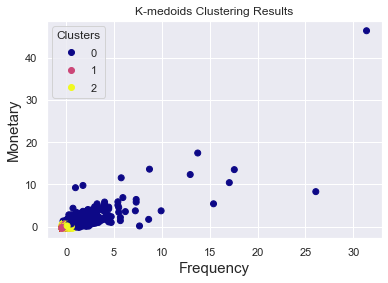

In [42]:
# Plot clusters
scatter=plt.scatter(rfm_scaled['Frequency'], rfm_scaled['Monetary'], c=rfm_df['Cluster_Kmedoids'], cmap='plasma')
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)
plt.title('K-medoids Clustering Results')

# Add legend
plt.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

### 1.5. THIRD CLUSTERING METHOD- FUZZY C-MEANS

### 1.5.1. Fuzzy C-Means 

In [43]:
!pip install fuzzy-c-means

In [44]:
# Create an np array
x = rfm_scaled.values
x

array([[ 1.5724376 ,  0.44549115, -0.30662128],
       [-0.95019575,  0.18471696,  0.63355356],
       [ 0.22735227, -0.16298195, -0.32280283],
       ...,
       [ 2.19950586, -0.42375614, -0.38142016],
       [ 1.31873823, -0.33683141, -0.12509102],
       [-0.75872453,  0.09779223,  0.19004267]])

In [45]:
# Import FCM algorithm
from fcmeans import FCM

# Apply Fuzzy C-Means clustering
fcm = FCM(n_clusters=3, random_state=42)
fcm.fit(x)
# Find cluster labels
cluster_labels = np.argmax(fcm.u, axis=1)

# Add cluster labels to RFM data
rfm_df['Cluster_Fuzzy'] = cluster_labels


In [46]:
# We added a new colum called "Cluster_Fuzzy" which classify each costumer in one cluster
rfm_df.head()

,Recency,Frequency,Monetary,Cluster_Kmeans,Cluster_Kmedoids,Cluster_Fuzzy
Customer_ID,,,,,,
12346.0,551,11,372.86,0,1,2
12347.0,24,8,3888.01,1,0,0
12348.0,270,4,312.36,0,1,0
12349.0,40,3,2635.04,1,2,0
12350.0,332,1,294.40,0,1,2


In [47]:
# Analyzing of Clustering based on RFM
rfm_df.groupby(["Cluster_Fuzzy"])[["Recency", "Frequency", "Monetary"]].mean()

,Recency,Frequency,Monetary
Cluster_Fuzzy,,,
0,95.595331,4.829392,1154.625193
1,50.176339,29.508929,8713.083607
2,487.692063,2.121164,458.642070


In [48]:
# Print the size of each cluster
print(rfm_df['Cluster_Fuzzy'].value_counts())

0    3341
2    1890
1     448
Name: Cluster_Fuzzy, dtype: int64


In [49]:
# Finding the center of the each cluster 
centres = fcm.centers
centres

array([[-0.6386657 , -0.11250489, -0.11938951],
       [-0.81582477,  1.65694945,  1.54373264],
       [ 1.27423481, -0.31444967, -0.27163284]])

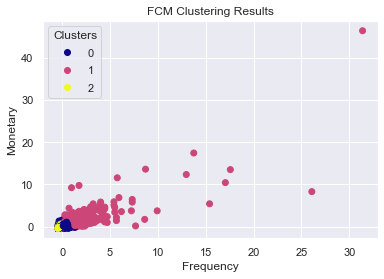

In [50]:
# Plot the clusters
scatter=plt.scatter(rfm_scaled['Frequency'], rfm_scaled['Monetary'], c=rfm_df['Cluster_Fuzzy'], cmap='plasma')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('FCM Clustering Results')

# Add legend
plt.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

### 1.6. EVALUATING CLUSTERING ALGORITHMS-"Silhouette coefficient"

In [51]:
# Import silhouette score from sklearn library
from sklearn.metrics import silhouette_score

In [52]:
# Display the silhouette score values

## K-means
silhouette = silhouette_score(rfm_scaled, kmeans.labels_, metric='euclidean')
print('Silhouette score K-means:', silhouette)

## K-medoids
silhouette = silhouette_score(rfm_scaled, kmedoids.labels_, metric='euclidean')
print('Silhouette score K-medoids:', silhouette)

## FCM
silhouette = silhouette_score(rfm_scaled, cluster_labels, metric='euclidean')
print('Silhouette score FCM:', silhouette)

Silhouette score K-means: 0.5308913216480491
Silhouette score K-medoids: 0.539288244348331
Silhouette score FCM: 0.5698915034888655


## 2. MARKET BASKET ANALYSIS

### 2.1. DATA PREPARATION FOR MBA

For this section we used 'df_cleaned' from "1.1. DATA PREPARATION FOR CLUSTERING".

In [53]:
# Defining the dataset that we are going to use for this stage. 
# Encoding the variable "Item_name" in order to get the number of sales per product for each invoice.

df_mba = df_cleaned.groupby(["Invoice", "Item_name"])[["Quantity"]].sum(
).unstack().reset_index().fillna(0).set_index("Invoice")

In [54]:
# Visualizing data. We have 33364 observations ('Invoice') and 4840 features ('Item_name')
df_mba.head()

Quantity                            \
Item_name   DOORMAT UNION JACK GUNS AND ROSES  3 STRIPEY MICE FELTCRAFT   
Invoice                                                                   
489434                                    0.0                       0.0   
489435                                    0.0                       0.0   
489436                                    0.0                       0.0   
489437                                    0.0                       0.0   
489439                                    0.0                       0.0   

                                                                         \
Item_name  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE   
Invoice                                                                   
489434                               0.0                            0.0   
489435                               0.0                            0.0   
489436                               0.0                            0.0   
489437                               0.0                            0.0   
489439                               0.0                            0.0   

                                                         \
Item_name  ANIMAL STICKERS  BLACK PIRATE TREASURE CHEST   
Invoice                                                   
489434                 0.0                          0.0   
489435                 0.0                          0.0   
489436                 0.0                          0.0   
489437                 0.0                          0.0   
489439                 0.0                          0.0   

                                                                            \
Item_name  BROWN  PIRATE TREASURE CHEST   CAMPHOR WOOD PORTOBELLO MUSHROOM   
Invoice                                                                      
489434                               0.0                               0.0   
489435                               0.0                               0.0   
489436                               0.0                               0.0   
489437                               0.0                               0.0   
489439                               0.0                               0.0   

                                                                ...  \
Item_name  CHERRY BLOSSOM  DECORATIVE FLASK  DOLLY GIRL BEAKER  ...   
Invoice                                                         ...   
489434                                  0.0                0.0  ...   
489435                                  0.0                0.0  ...   
489436                                  0.0                0.0  ...   
489437                                  0.0                0.0  ...   
489439                                  0.0                0.0  ...   

                                                               \
Item_name ZINC STAR T-LIGHT HOLDER  ZINC SWEETHEART SOAP DISH   
Invoice                                                         
489434                          0.0                       0.0   
489435                          0.0                       0.0   
489436                          0.0                       0.0   
489437                          0.0                       0.0   
489439                          0.0                       0.0   

                                                                           \
Item_name ZINC SWEETHEART WIRE LETTER RACK ZINC T-LIGHT HOLDER STAR LARGE   
Invoice                                                                     
489434                                 0.0                            0.0   
489435                                 0.0                            0.0   
489436                                 0.0                            0.0   
489437                                 0.0                            0.0   
489439                                 0.0                            0.0   

                              

In [55]:
# Some modifications in the table
df_mba.columns = df_mba.columns.droplevel() # remove the top level of column index
df_mba = df_mba.rename_axis(None, axis=1) # remove column axis name

In [56]:
# Display the first 5 rows after the modifications
df_mba.head()

,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,DOLLY GIRL BEAKER,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# In order to finish the one hot encoding from above, positive values are converted into 1, and negative values or equal to 0 into 0
def num(x):
    if x <= 0:
        return 0
    elif x >=1:
        return 1
basket_mba = df_mba.applymap(num)

### 2.2. ASSOCIATION ANALYSIS- THE APRIORI PRINCIPLE

In [58]:
!pip install mlxtend

In [59]:
from mlxtend.frequent_patterns import apriori

# Calculate the sfrequenct itemsets by calling a method apriori
frequent_itemsets_ap = apriori(basket_mba, min_support = 0.02, use_colnames = True)
frequent_itemsets_ap.sort_values(by = "support", ascending = False)

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
160,0.117312,(WHITE HANGING HEART T-LIGHT HOLDER)
8,0.064021,(ASSORTED COLOUR BIRD ORNAMENT)
62,0.063661,(JUMBO BAG RED RETROSPOT)
102,0.056678,(PARTY BUNTING)
74,0.056138,(LUNCH BAG BLACK SKULL.)
...,...,...
0,0.020321,(3 STRIPEY MICE FELTCRAFT)
99,0.020201,(PAINTED METAL PEARS ASSORTED)
31,0.020171,(FELTCRAFT DOLL MOLLY)
86,0.020141,(LUNCH BOX I LOVE LONDON)


In [60]:
from mlxtend.frequent_patterns import association_rules

# Display the rules due to apriori algorithm
rules_ap = association_rules(frequent_itemsets_ap, metric = "confidence", min_threshold = 0.1)
rules_ap.sort_values(by = "confidence", ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.027185,0.030392,0.021370,0.786108,25.865591,0.020544,4.533167,0.988203
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.030392,0.027185,0.021370,0.703156,25.865591,0.020544,3.277191,0.991471
16,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.031681,0.047956,0.021730,0.685904,14.302803,0.020211,3.031056,0.960514
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.030602,0.033389,0.020531,0.670911,20.093600,0.019509,2.937231,0.980230
15,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.043670,0.117312,0.028804,0.659574,5.622392,0.023681,2.592896,0.859682
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.033389,0.030602,0.020531,0.614901,20.093600,0.019509,2.517272,0.983056
19,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.046038,0.051732,0.027485,0.597005,11.540256,0.025103,2.353052,0.957424
18,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.051732,0.046038,0.027485,0.531286,11.540256,0.025103,2.035277,0.963174
6,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.044329,0.054700,0.023438,0.528736,9.666157,0.021014,2.005881,0.938133
4,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.048825,0.049874,0.024218,0.496010,9.945235,0.021783,1.885207,0.945619


In [61]:
# Display the main element or rules of MBA for Apriori algorithm
main_rules_ap = rules_ap[['antecedents', 'consequents', 'confidence', 'support','lift']].sort_values(by='confidence', ascending=False).head(10)
main_rules_ap

,antecedents,consequents,confidence,support,lift
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.786108,0.021370,25.865591
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.703156,0.021370,25.865591
16,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.685904,0.021730,14.302803
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.670911,0.020531,20.093600
15,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.659574,0.028804,5.622392
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.614901,0.020531,20.093600
19,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.597005,0.027485,11.540256
18,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.531286,0.027485,11.540256
6,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.528736,0.023438,9.666157
4,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.496010,0.024218,9.945235


### 2.3.  ASSOCIATION ANALYSIS- FP GROWTH

In [62]:
from mlxtend.frequent_patterns import fpgrowth

# Calculate the sfrequenct itemsets by calling a method fpgrowth
frequent_itemsets_fp = fpgrowth(basket_mba, min_support = 0.01, use_colnames = True)
frequent_itemsets_fp.sort_values(by = "support", ascending = False)

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
26,0.117312,(WHITE HANGING HEART T-LIGHT HOLDER)
3,0.064021,(ASSORTED COLOUR BIRD ORNAMENT)
371,0.063661,(JUMBO BAG RED RETROSPOT)
178,0.056678,(PARTY BUNTING)
142,0.056138,(LUNCH BAG BLACK SKULL.)
...,...,...
610,0.010041,"(LUNCH BAG WOODLAND, LUNCH BAG SUKI DESIGN )"
666,0.010011,"(RED RETROSPOT CHARLOTTE BAG, CHARLOTTE BAG SU..."
121,0.010011,(RED SPOTTY CUP)
506,0.010011,(SET OF 12 MINI LOAF BAKING CASES)


In [63]:
# Display the rules due to fpgrowth algorithm
rules_fp = association_rules(frequent_itemsets_fp, metric = "confidence", min_threshold = 0.1)
rules_fp.sort_values(by = "confidence", ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
350,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",(POPPY'S PLAYHOUSE KITCHEN),0.011210,0.018193,0.010340,0.922460,50.703380,0.010137,12.661921,0.991391
274,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.017114,0.027185,0.015286,0.893170,32.855259,0.014821,9.106186,0.986446
345,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.013548,0.018193,0.011959,0.882743,48.520345,0.011713,8.373144,0.992841
348,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",(POPPY'S PLAYHOUSE BEDROOM ),0.011959,0.016365,0.010340,0.864662,52.836211,0.010145,7.267970,0.992948
343,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.016365,0.018193,0.013877,0.847985,46.609857,0.013580,6.458632,0.994826
...,...,...,...,...,...,...,...,...,...,...
2,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.117312,0.064021,0.014177,0.120848,1.887631,0.006667,1.064639,0.532731
8,(WHITE HANGING HEART T-LIGHT HOLDER),(LOVE BUILDING BLOCK WORD),0.117312,0.044329,0.014027,0.119571,2.697336,0.008827,1.085460,0.712895
98,(WHITE HANGING HEART T-LIGHT HOLDER),(ZINC METAL HEART DECORATION),0.117312,0.034918,0.012828,0.109351,3.131664,0.008732,1.083572,0.771146
211,(WHITE HANGING HEART T-LIGHT HOLDER),(NATURAL SLATE HEART CHALKBOARD ),0.117312,0.047207,0.012558,0.107052,2.267727,0.007021,1.067020,0.633327


In [64]:
# Display the main element or rules of MBA for FP Growth algorithm
main_rules_fp = rules_fp[['antecedents', 'consequents', 'confidence', 'support','lift']].sort_values(by='confidence', ascending=False).head(10)
main_rules_fp

,antecedents,consequents,confidence,support,lift
350,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",(POPPY'S PLAYHOUSE KITCHEN),0.922460,0.010340,50.703380
274,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.893170,0.015286,32.855259
345,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.882743,0.011959,48.520345
348,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",(POPPY'S PLAYHOUSE BEDROOM ),0.864662,0.010340,52.836211
343,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.847985,0.013877,46.609857
273,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.845771,0.015286,27.828707
269,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.835180,0.018073,30.722103
346,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE BEDROOM ),0.827434,0.011210,50.561347
171,(KITCHEN METAL SIGN),(BATHROOM METAL SIGN),0.791353,0.012618,29.632676
271,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.790859,0.017114,26.021904


### 2.4.  EVALUATING MBA ALGORITHMS

In [65]:
import time

# Compare Apriori and FP-growth algorithms

 ## A priori
start_time = time.time()
frequent_itemsets_ap = apriori(basket_mba, min_support=0.02)
print("Apriori algorithm execution time: ", time.time() - start_time)

 ## FP Growth
start_time = time.time()
frequent_itemsets_fp = fpgrowth(basket_mba, min_support=0.01)
print("FP-growth algorithm execution time: ", time.time() - start_time)


print("Frequent itemsets found by Apriori algorithm: ")
print(frequent_itemsets_ap)

print("Frequent itemsets found by FP-growth algorithm: ")
print(frequent_itemsets_fp)

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori algorithm execution time:  7.606765985488892


/Users/ana/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


FP-growth algorithm execution time:  5.1822898387908936
Frequent itemsets found by Apriori algorithm: 
      support      itemsets
0    0.020321          (76)
1    0.039384         (135)
2    0.020501         (139)
3    0.046697         (141)
4    0.031621         (147)
..        ...           ...
175  0.022150  (2401, 2388)
176  0.020741  (2401, 2407)
177  0.028804  (4621, 3349)
178  0.021730  (4236, 4271)
179  0.027485  (4698, 4702)

[180 rows x 2 columns]
Frequent itemsets found by FP-growth algorithm: 
      support      itemsets
0    0.047956        (4236)
1    0.016904        (3675)
2    0.013158        (3028)
3    0.064021         (261)
4    0.054700        (2059)
..        ...           ...
683  0.011449  (2403, 2388)
684  0.010670  (2398, 2390)
685  0.010101  (2403, 2390)
686  0.011060  (2881, 4196)
687  0.013038  (1729, 1730)

[688 rows x 2 columns]
